## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np #allow to make arrays
import matplotlib.pyplot as plt #visualize results on charts
import pandas as pd #import dataset and manage easily

## Load the Training Dataset and Use the Open Stock Price Column to Train Your Model.

In [2]:
# Importing the training set - only importing training set, test set later on
#rnn has no idea of the test set's data, then after training is done, test set will eb important
dataset_train = pd.read_csv(r'Google_Stock_Price_Train.csv')
#need to make into numpy arrays because only nump arrays can be input values in keras
training_set = dataset_train.iloc[:, 1:2].values
#getting everything from the columns (.values makes the numpy array)

In [3]:
training_set.shape

(1258, 1)

In [4]:
# Feature Scaling
# Normalizing the Dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#fit (gets min and max on data to apply formula) tranform(compute scale stock prices to each formula)

## Creating X_train and y_train Data Structures.

In [5]:
# Creating a data structure with 60 timesteps and 1 output
#60 times steps- at each time t and look at 60 previous time steps, then make new prediction
# 1 time step leads to overfitting, 20 is still too low
#60 previous financial days- in 3 months
X_train = []
y_train = []
for i in range(60, 1257): # upper bound is number of values
    X_train.append(training_set_scaled[i-60:i, 0]) #takes 60 previous stock prices from 60 past stock prices
    y_train.append(training_set_scaled[i, 0]) #contains stock price learned to predict
X_train, y_train = np.array(X_train), np.array(y_train) # make into numpy arrays
#Need to add dimension to because not only prescition with one stock price but other indicators
# (like other columns in dataset or other stocks that may affect this one )

In [6]:
# Reshaping- add dimension in numpy array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#adds dimension in numpy array currently only have one indicator, with new dimension will
# have more indicators, be compatible for "input shape" of RNN
# format according to keras documentation

In [7]:
X_train.shape

(1197, 60, 1)

## Part 2 - Building the RNN stacked lstm with dropout regularization to prevent overfitting

In [8]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
# Initialising the RNN
regressor = Sequential()
#reps sequence of layers, predicting continous values (so it is a regression)

In [11]:
# Adding the first LSTM layer and some Dropout regularisation
#dropout to prevent overfitting
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor- object of sequential class, can add layers to networ.
#use lstm class and create object of lstm class- 3 args
#num of units, return sequences- set to true because is stacked lstms, and shape
#units- neurons in first layer. 50 in layers for high dimensionality, can capture upward and downward
regressor.add(Dropout(0.2))
# takes arg of dropout late- num of neurons want to drop. dropping 20% of neurons to be ignored
#during trianing for each iteration. 10 neurons will be dropped out

In [12]:
# Adding a second LSTM layer and some Dropout regularisation
# total of 4 layers, simply need to copy, only change is input shape so dont need to specify that,
#automatically recognised through input shape
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a third LSTM layer and some Dropout regularisation
# same as second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
# almost same, but return sequence is false because it is the last lstm layer
#(so it is removed becasue default is false)
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# Adding the output layer
#add fully connected layer through dense class- dimesion/units/neurons is 1
regressor.add(Dense(units = 1))

In [16]:
# Compiling the RNN
#regressior because predicting continuous value,
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the Model.

In [17]:
# Fitting the RNN to the Training set
#have not made connection to training set, training will take place
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)
#100 gives good convergence trained on certain batch sizes,

Epoch 1/200
38/38 [==============================] - 12s 119ms/step - loss: 0.0499
Epoch 2/200
38/38 [==============================] - 3s 85ms/step - loss: 0.0072
Epoch 3/200
38/38 [==============================] - 5s 137ms/step - loss: 0.0058
Epoch 4/200
38/38 [==============================] - 5s 133ms/step - loss: 0.0060
Epoch 5/200
38/38 [==============================] - 5s 132ms/step - loss: 0.0056
Epoch 6/200
38/38 [==============================] - 5s 125ms/step - loss: 0.0054
Epoch 7/200
38/38 [==============================] - 4s 107ms/step - loss: 0.0049
Epoch 8/200
38/38 [==============================] - 5s 120ms/step - loss: 0.0048
Epoch 9/200
38/38 [==============================] - 6s 169ms/step - loss: 0.0046
Epoch 10/200
38/38 [==============================] - 5s 120ms/step - loss: 0.0049
Epoch 11/200
38/38 [==============================] - 4s 107ms/step - loss: 0.0050
Epoch 12/200
38/38 [==============================] - 5s 133ms/step - loss: 0.0041
Epoch 13/200


38/38 [==============================] - 4s 108ms/step - loss: 0.0015
Epoch 100/200
38/38 [==============================] - 6s 169ms/step - loss: 0.0014
Epoch 101/200
38/38 [==============================] - 5s 124ms/step - loss: 0.0013
Epoch 102/200
38/38 [==============================] - 7s 179ms/step - loss: 0.0013
Epoch 103/200
38/38 [==============================] - 6s 148ms/step - loss: 0.0013
Epoch 104/200
38/38 [==============================] - 6s 155ms/step - loss: 0.0014
Epoch 105/200
38/38 [==============================] - 6s 165ms/step - loss: 0.0015
Epoch 106/200
38/38 [==============================] - 5s 129ms/step - loss: 0.0016
Epoch 107/200
38/38 [==============================] - 7s 187ms/step - loss: 0.0014
Epoch 108/200
38/38 [==============================] - 4s 107ms/step - loss: 0.0015
Epoch 109/200
38/38 [==============================] - 7s 193ms/step - loss: 0.0015
Epoch 110/200
38/38 [==============================] - 6s 157ms/step - loss: 0.0014
Epoch 

38/38 [==============================] - 4s 115ms/step - loss: 9.6644e-04
Epoch 196/200
38/38 [==============================] - 7s 189ms/step - loss: 8.4603e-04
Epoch 197/200
38/38 [==============================] - 6s 152ms/step - loss: 0.0010
Epoch 198/200
38/38 [==============================] - 6s 147ms/step - loss: 9.9792e-04
Epoch 199/200
38/38 [==============================] - 5s 145ms/step - loss: 0.0010
Epoch 200/200
38/38 [==============================] - 7s 174ms/step - loss: 9.5271e-04


## Part 3 - Making the predictions and visualising the results

In [18]:
# Getting the Test Set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis =0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#getting input of each previous financial days
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [20]:
inputs.shape

(80, 1)

In [21]:
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


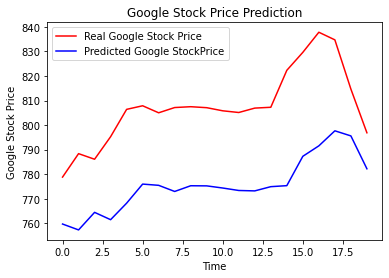

In [23]:
# Visualising the results
plt.plot(real_stock_price, color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',label='Predicted Google StockPrice')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()